In this notebook I will be completing th Traffic example found in the R package. I will use the same data. To begin I will load the dataset

In [3]:
import pandas as pd

raw_traffic_data = pd.read_csv("data/Traffic/trafficdata.csv")

surv2 = raw_traffic_data.filter(like="Bin 2", axis=1)
surv4 = raw_traffic_data.filter(like="Bin 4", axis=1)

surv4

,Bin 4 00:00:00,Bin 4 00:15:00,Bin 4 00:30:00,Bin 4 00:45:00,Bin 4 01:00:00,Bin 4 01:15:00,Bin 4 01:30:00,Bin 4 01:45:00,Bin 4 02:00:00,Bin 4 02:15:00,...,Bin 4 21:30:00,Bin 4 21:45:00,Bin 4 22:00:00,Bin 4 22:15:00,Bin 4 22:30:00,Bin 4 22:45:00,Bin 4 23:00:00,Bin 4 23:15:00,Bin 4 23:30:00,Bin 4 23:45:00
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17465,3,8,4,2,0,2,2,2,3,2,...,3,5,2,4,0,6,7,2,5,2
17466,2,6,2,1,6,5,0,4,2,5,...,1,7,0,6,2,4,3,3,2,3
17467,2,1,3,3,0,0,0,1,0,0,...,8,10,8,2,9,8,7,6,4,1
17468,2,1,2,4,1,2,1,0,2,1,...,12,13,11,9,6,12,11,7,4,5


This file contains data from traffic intersections taken over a 24 hour period in 15 minute intervals. Now I will separate the data into X data and Y data. surv2 and surv4 correspond with the measurements taken at the AM hours and PM hours respectively.

In [11]:
splitx = 48

surv2_x = surv2.values[:, 0:splitx]
surv2_y = surv2.values[:, splitx:96]

surv4_x = surv4.values[:, 0:splitx]
surv4_y = surv4.values[:, splitx:96]

surv2_x.shape

(17470, 48)

Let's plot our data.

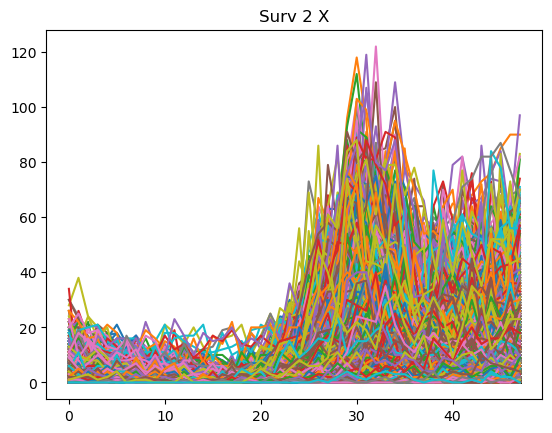

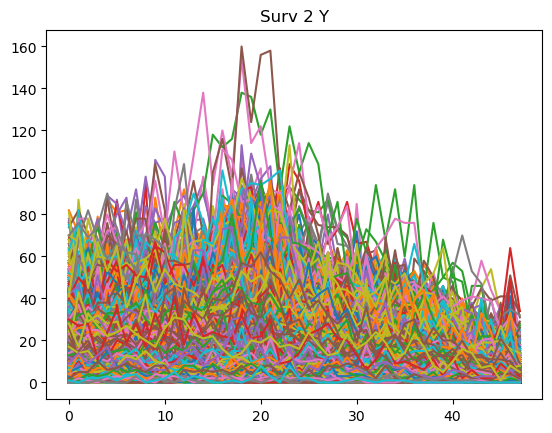

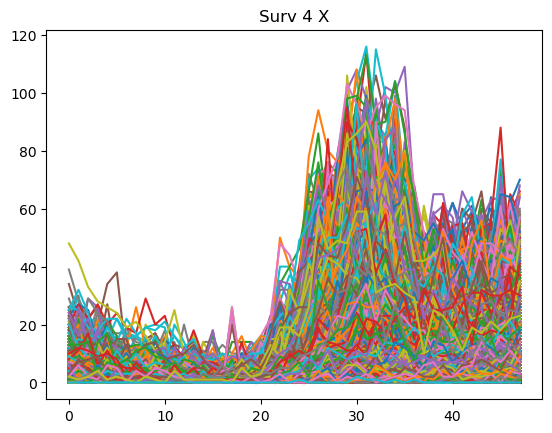

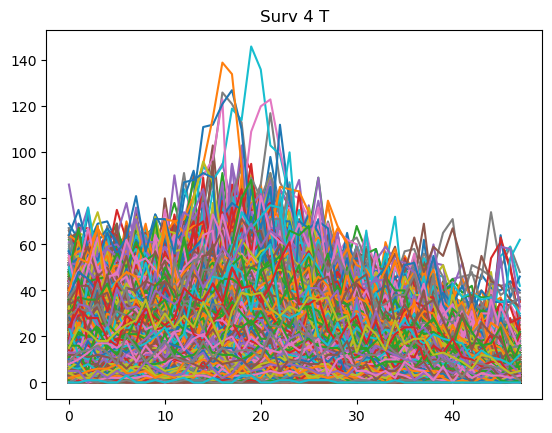

In [14]:
import matplotlib.pyplot as plt

for row in surv2_x:
    plt.plot(row)
plt.title("Surv 2 X")
plt.show()

for row in surv2_y:
    plt.plot(row)
plt.title("Surv 2 Y")
plt.show()

for row in surv4_x:
    plt.plot(row)
plt.title("Surv 4 X")
plt.show()

for row in surv4_y:
    plt.plot(row)
plt.title("Surv 4 T")
plt.show()

Now I will convert them to functional data. Surv 2 has 48 points from 0-12. First we must determine which basis we will use to convert our raw data to functional data.

Text(0.5, 1.0, 'Surv 2 X BSpline Data')

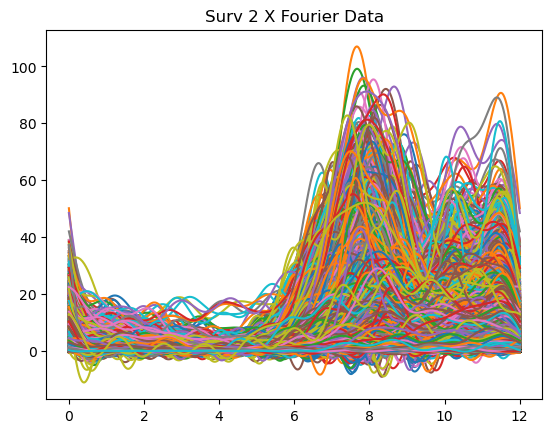

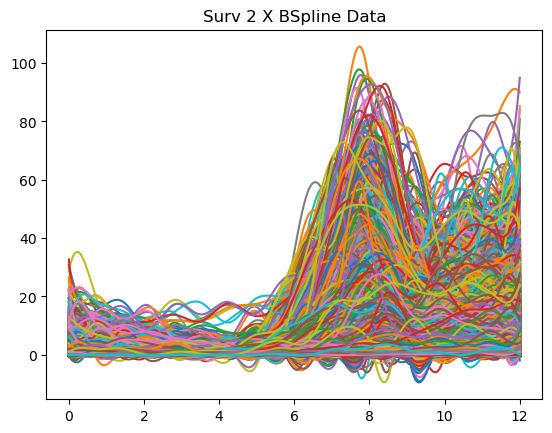

In [21]:
import numpy as np
from skfda.representation.grid import FDataGrid
from skfda.representation.basis import FourierBasis, BSplineBasis

surv2_grid_points = np.linspace(0, 12, 48)

surv2_x_fourier = FDataGrid(data_matrix=surv2_x, grid_points=surv2_grid_points).to_basis(FourierBasis(n_basis=20))
surv2_x_bspline = FDataGrid(data_matrix=surv2_x, grid_points=surv2_grid_points).to_basis(BSplineBasis(n_basis=20))

surv2_x_fourier.plot()
plt.title("Surv 2 X Fourier Data")

surv2_x_bspline.plot()
plt.title("Surv 2 X BSpline Data")

They are both similar in their representations, so I will use a Fourier Basis in FunWeightClust.

In [22]:
surv2_y_fourier = FDataGrid(data_matrix=surv2_y, grid_points=surv2_grid_points).to_basis(FourierBasis(n_basis=20))

surv4_grid_points = np.linspace(12, 24, 48)
surv4_x_fourier = FDataGrid(data_matrix=surv4_x, grid_points=surv4_grid_points).to_basis(FourierBasis(n_basis=20))
surv4_y_fourier = FDataGrid(data_matrix=surv4_y, grid_points=surv4_grid_points).to_basis(FourierBasis(n_basis=20))



In [24]:
import funweightclust as fwc

#Some of the x models you can use are: "AKJBKQKDK","AKJBQKDK", "AKBKQKDK", "ABKQKDK", "AKBQKDK", "ABQKDK"
#Some of the y models you can use are: "EII", "VII", "EEI", "VEI", "EVI", "VVI", "EEE", "VEE", "EVE", "EEV", "VVE", "VEV","EVV","VVV" 

models = ["AKJBQKDK"]
modelsy = ["EII", "VII"]
surv2_res = fwc.funweightclust(surv2_x_fourier, surv2_y_fourier, K = 2, model=models, modely = modelsy, init="kmeans", nb_rep = 1, threshold = 0.001)
surv4_res = fwc.funweightclust(surv4_x_fourier, surv4_y_fourier, K = 2, model=models, modely = modelsy, init="kmeans", nb_rep = 1, threshold = 0.001)


FunWeightClust:   2.1 mins  |  Approx. remaining:       0.0 secs  |    100% complete 

      Model ModelY  K Threshold Complexity            BIC
1  AKJBQKDK    VII  2     0.001     471.00  -2,732,207.64
2  AKJBQKDK    EII  2     0.001     441.00  -3,024,351.35

Selected model AKJBQKDK-VII with 2 clusters

Selection Criterion: bic

FunWeightClust:   2.3 mins  |  Approx. remaining:       0.0 secs  |    100% complete 

      Model ModelY  K Threshold Complexity            BIC
1  AKJBQKDK    VII  2     0.001     471.00  -2,714,329.44
2  AKJBQKDK    EII  2     0.001     416.00  -3,118,913.27

Selected model AKJBQKDK-VII with 2 clusters

Selection Criterion: bic

